# Decision Tree Worksheet

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv (url, names=names)

invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [3]:
decision_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=2).fit(X_train, y_train)

Print accuracy of training and validation data.

In [4]:
print ("Testing accuracy is " + str(metrics.accuracy_score (y_train, decision_tree.predict(X_train))))
print ("Validation accuracy is " + str(metrics.accuracy_score (y_val, decision_tree.predict(X_val))))

Testing accuracy is 0.96
Validation accuracy is 0.7936507936507936


Make a model with a low max-depth and higher minimum sample leafs.

In [5]:
decision_tree2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50).fit(X_train, y_train)

Print accuracy of training and validation data.

In [6]:
print ("Testing accuracy is " + str(metrics.accuracy_score (y_train, decision_tree2.predict(X_train))))
print ("Validation accuracy is " + str(metrics.accuracy_score (y_val, decision_tree2.predict(X_val))))

Testing accuracy is 0.772
Validation accuracy is 0.7301587301587301


Explain the accuracy results below. 

(YOUR ANSWER HERE)

## Metrics

Plot the ROC curve and print the AUC of the second model.

0.7804347826086957


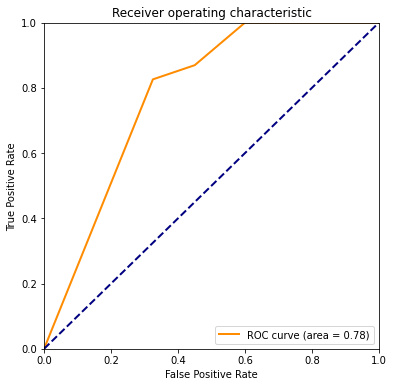

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, decision_tree2.predict_proba(X_val)[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

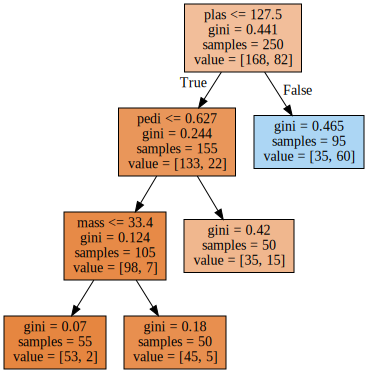

In [9]:
dot_data = tree.export_graphviz(decision_tree2, out_file=None, filled=True, feature_names=X_cols)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

I think X[n] is the column of X that is represented by the index value n

Question 2: What is the root feature? Does it make sense as the root feature?

root feature is blood plasma, since the diagnosis is for diabetes this makes sense

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

training accuracy would be 100 percent, test accuracy would be about 30-40 percent lower

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [10]:
decision_tree3 = DecisionTreeClassifier(max_depth=500, min_samples_leaf=1).fit(X_train, y_train)
print ("Testing accuracy is " + str(metrics.accuracy_score (y_train, decision_tree3.predict(X_train))))
print ("Validation accuracy is " + str(metrics.accuracy_score (y_val, decision_tree3.predict(X_val))))

Testing accuracy is 1.0
Validation accuracy is 0.7619047619047619


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [15]:
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=500, min_samples_leaf=1).fit (X_train, y_train)

Print accuracy of training and validation data.

In [16]:
print ("Testing accuracy is " + str(metrics.accuracy_score (y_train, rand_forest.predict(X_train))))
print ("Validation accuracy is " + str(metrics.accuracy_score (y_val, rand_forest.predict(X_val))))

Testing accuracy is 1.0
Validation accuracy is 0.8095238095238095


How did the accuracy compare to the decision tree's accuracy?

the more trees in the forest, the higher the validation accuracy

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [25]:
features = list(rand_forest.feature_importances_)
top_three = sorted([(x,i) for (i,x) in enumerate(features)], reverse=True)[:3]
for i in range(3):
  print (data.iloc[:, top_three[i][1]])

0       89.0
1      137.0
2       78.0
3      197.0
4      189.0
       ...  
387    181.0
388    128.0
389     88.0
390    101.0
391    121.0
Name: plas, Length: 392, dtype: float64
0       94.0
1      168.0
2       88.0
3      543.0
4      846.0
       ...  
387    510.0
388    110.0
389     16.0
390    180.0
391    112.0
Name: test, Length: 392, dtype: float64
0      21
1      33
2      26
3      53
4      59
       ..
387    26
388    37
389    22
390    63
391    30
Name: age, Length: 392, dtype: int64


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

In [27]:
for i in range(1, 100, 5):
  forests = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
  print ("Validation accuracy for " + str(i) + " trees is " + str(metrics.accuracy_score (y_val, forests.predict(X_val))))


Validation accuracy for 1 trees is 0.6349206349206349
Validation accuracy for 6 trees is 0.7777777777777778
Validation accuracy for 11 trees is 0.8571428571428571
Validation accuracy for 16 trees is 0.7142857142857143
Validation accuracy for 21 trees is 0.7777777777777778
Validation accuracy for 26 trees is 0.746031746031746
Validation accuracy for 31 trees is 0.7619047619047619
Validation accuracy for 36 trees is 0.7777777777777778
Validation accuracy for 41 trees is 0.8253968253968254
Validation accuracy for 46 trees is 0.7619047619047619
Validation accuracy for 51 trees is 0.8253968253968254
Validation accuracy for 56 trees is 0.7936507936507936
Validation accuracy for 61 trees is 0.7777777777777778
Validation accuracy for 66 trees is 0.8253968253968254
Validation accuracy for 71 trees is 0.7936507936507936
Validation accuracy for 76 trees is 0.8571428571428571
Validation accuracy for 81 trees is 0.7777777777777778
Validation accuracy for 86 trees is 0.7936507936507936
Validation ac

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

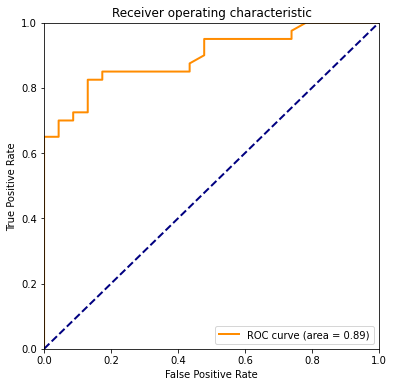

In [31]:
predictions = rand_forest.predict_proba(X_val)
tpr, fpr, thresholds = metrics.roc_curve(y_val, predictions[:,0])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()